
# 🛍️ Advanced Lab: Market Basket Analysis & Product Affinity with Detailed Insights

## 🎯 Objectives
- Apply Market Basket Analysis to a more complex dataset
- Extract and analyze frequent itemsets and association rules
- Interpret support, confidence, lift, and leverage
- Visualize and explain product affinities in depth

---


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')


## Step 1: Load and Explore Dataset

In [2]:

# Simulated complex transaction dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'eggs', 'milk'],
    ['milk', 'bread', 'cookies'],
    ['eggs', 'milk', 'butter'],
    ['bread', 'cookies', 'coffee'],
    ['milk', 'coffee', 'cookies', 'bread'],
    ['milk', 'bread', 'butter', 'eggs'],
    ['eggs', 'bread'],
    ['coffee', 'cookies'],
    ['milk', 'bread', 'cookies', 'coffee'],
    ['bread', 'butter', 'eggs', 'cookies'],
    ['milk', 'cookies', 'eggs'],
    ['bread', 'cookies', 'milk', 'butter'],
    ['bread', 'coffee'],
    ['cookies', 'milk', 'coffee'],
    ['milk', 'eggs'],
    ['milk', 'bread', 'butter'],
    ['coffee', 'eggs', 'bread'],
    ['cookies', 'milk'],
    ['milk', 'bread', 'coffee', 'cookies']
]

# One-hot encode transaction list
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()


,bread,butter,coffee,cookies,eggs,milk
0,True,True,False,False,False,True
1,True,False,False,False,True,True
2,True,False,False,True,False,True
3,False,True,False,False,True,True
4,True,False,True,True,False,False


## Step 2: Generate Frequent Itemsets Using Apriori Algorithm

In [3]:

# Minimum support set to 0.3
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False)


,support,itemsets
0,0.70,(bread)
5,0.70,(milk)
3,0.55,(cookies)
8,0.45,"(milk, bread)"
2,0.40,(coffee)
4,0.40,(eggs)
10,0.40,"(milk, cookies)"
7,0.35,"(bread, cookies)"
1,0.30,(butter)
6,0.30,"(coffee, bread)"


## Step 3: Extract Association Rules

In [4]:

# Generate rules using confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = rules.sort_values(by='lift', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage']].head(10)


,antecedents,consequents,support,confidence,lift,leverage
6,(cookies),(coffee),0.30,0.545455,1.363636,0.080
5,(coffee),(cookies),0.30,0.750000,1.363636,0.080
0,(coffee),(bread),0.30,0.750000,1.071429,0.020
7,(milk),(cookies),0.40,0.571429,1.038961,0.015
8,(cookies),(milk),0.40,0.727273,1.038961,0.015
3,(milk),(bread),0.45,0.642857,0.918367,-0.040
4,(bread),(milk),0.45,0.642857,0.918367,-0.040
1,(bread),(cookies),0.35,0.500000,0.909091,-0.035
2,(cookies),(bread),0.35,0.636364,0.909091,-0.035


## Step 4: Visualize Top Product Affinities

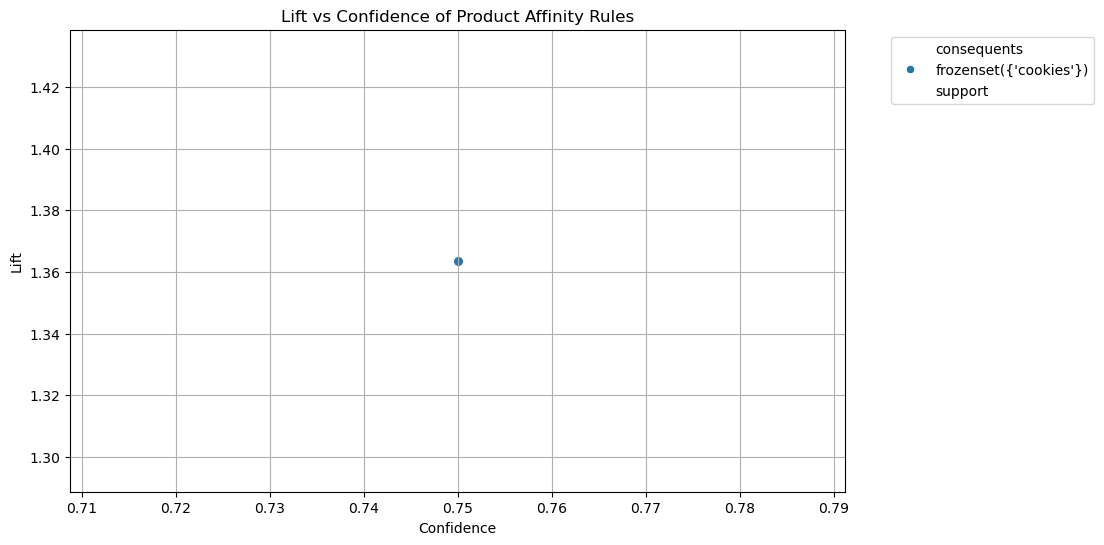

In [5]:

# Filter rules with high lift and confidence
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.6)]

# Plot lift vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=strong_rules, x='confidence', y='lift', size='support',
                hue='consequents', legend='brief', sizes=(50, 300))
plt.title('Lift vs Confidence of Product Affinity Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Step 5: Co-occurrence Matrix Heatmap

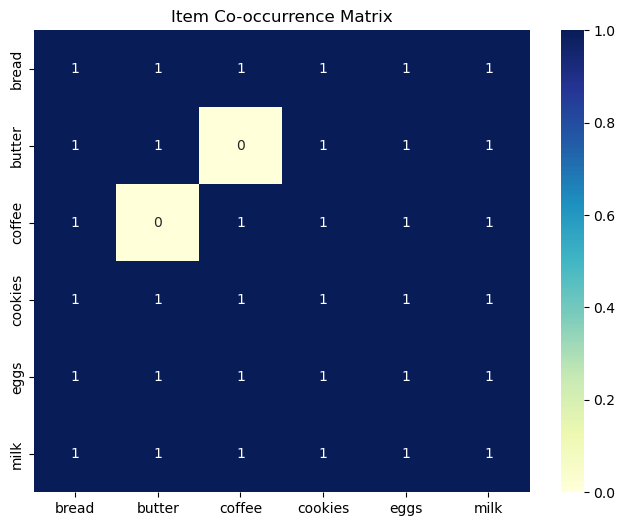

In [6]:

# Compute co-occurrence matrix
co_matrix = df.T.dot(df)
plt.figure(figsize=(8, 6))
sns.heatmap(co_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Item Co-occurrence Matrix")
plt.show()



---

## 📝 Summary & Interpretation

- **Support** measures how frequently items appear together in the dataset.
- **Confidence** evaluates the likelihood of item Y being purchased when item X is purchased.
- **Lift** > 1 indicates a strong positive relationship between itemsets.
- **Leverage** shows the difference between observed frequency and expected if items were independent.

These metrics help businesses identify product affinities for **cross-selling**, **product bundling**, or **personalized recommendations**.

